# Group 10 - Homework 7 -[Support Vector Machine]
## Group Members:
1.Mahajabin Mostafa   
2.Navya Madhuri Bagireddy  
3.Akshay Manoj  
4.Vinaika Maruvada

## 1.Watch Prof. Abu-Mostafa’s Lectures [4] and explain what margin and non-margin support vectors are.

In Prof. Abu-Mostafa's machine learning lectures, particularly in the context of support vector machines (SVMs), the notions of margin and support vectors are critical for understanding how SVMs function and how they identify an optimal decision boundary.

The margin serves as a safety buffer around the decision border generated by an SVM. It's similar to having a clean space between two sets of data points (indicating separate classes). The SVM seeks the largest feasible margin since a larger margin often results in higher generalization and less overfitting.

The unique data points that are closest to the decision border are known as support vectors. They are the most important factors that the SVM considers when determining where to draw that border. Where to put the decision line precisely is something the SVM would not know without these support vectors.

**Margin Support Vectors:** These are the support vectors that are closest to the decision boundary—that is, the ones that really touch the margin. They have significant influence over the SVM's learning process and margin positioning.

**Non margin Support Vectors:** These support vectors are nonetheless significant, although they are not as crucial as those that are. Though not as much as the margin support vectors, they are inside the margin and somewhat nudge the decision border.

Therefore, the support vectors—some of which are directly on the boundary of this space (margin support vectors) and others of which are slightly inside it (non-margin support vectors)—are the crucial data points that direct the SVM in establishing this safe space. Collectively, they support the SVM in making informed decisions concerning the efficient separation of various data kinds.

## 2.Create a binary classification problem using sklearn.datasets.make moons. Build a SVM classifier model and investigate the effect of hyper-parameters C, γ, and kernels on the model performance.


## About the Dataset

scikit-learn includes various random sample generators that can be used to build artificial datasets of controlled size and complexity.
make_moons from sklearn is to generate 2d binary classification datasets that are challenging to certain algorithms (e.g. centroid-based clustering or linear classification), including optional Gaussian noise. They are useful for visualization. make_moons produces two interleaving half circles.

## Aim

The goal is to build a SVM classifier model using sklearn.datasets.make moons and investigate the effect of hyper-parameters C, γ, and kernels on the model performance. 

## Methodology

**Importing the necessary libraries and data set**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_moons

from mlxtend.plotting import plot_decision_regions

In [3]:
X,y = make_moons(random_state=42)

In [4]:
X

array([[ 1.51839257e+00, -3.55142763e-01],
       [ 1.84408430e-02,  3.08841371e-01],
       [ 7.15472413e-01, -4.58667853e-01],
       [-9.67294863e-01,  2.53654584e-01],
       [-9.49055747e-01,  3.15108218e-01],
       [-8.01413622e-01,  5.98110530e-01],
       [ 1.59599895e-01,  9.87181783e-01],
       [ 1.34536505e+00, -4.38468422e-01],
       [ 8.01413622e-01,  5.98110530e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 4.04783343e-01,  9.14412623e-01],
       [-3.45365054e-01,  9.38468422e-01],
       [ 9.03976974e-01, -4.95379113e-01],
       [-5.18392568e-01,  8.55142763e-01],
       [ 1.83808810e+00, -4.55349012e-02],
       [ 9.67294863e-01,  2.53654584e-01],
       [ 1.09602303e+00, -4.95379113e-01],
       [ 1.15959990e+00, -4.87181783e-01],
       [ 7.18349350e-01,  6.95682551e-01],
       [-4.04783343e-01,  9.14412623e-01],
       [ 5.09442530e-02,  1.84891782e-01],
       [ 1.76144596e+00, -1.48228395e-01],
       [-9.60230259e-02,  9.95379113e-01],
       [-9.

In [5]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

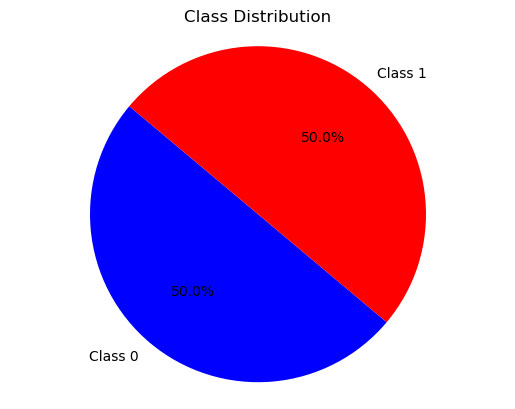

In [6]:
class_0_count = sum(y == 0)
class_1_count = sum(y == 1)
total_count = len(y)

class_0_percentage = (class_0_count / total_count) * 100
class_1_percentage = (class_1_count / total_count) * 100

# Plot the pie chart
labels = ['Class 0', 'Class 1']
sizes = [class_0_percentage, class_1_percentage]
colors = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution')

plt.show()


This pie chart depicts the distribution of two classes in the dataset. The blue section represents Class 0, which accounts for around 50% of the data, whereas the red portion represents Class 1, which accounts for 50%. This enables us to comprehend the relative proportions of each class, offering insights into the general balance and composition of the dataset.


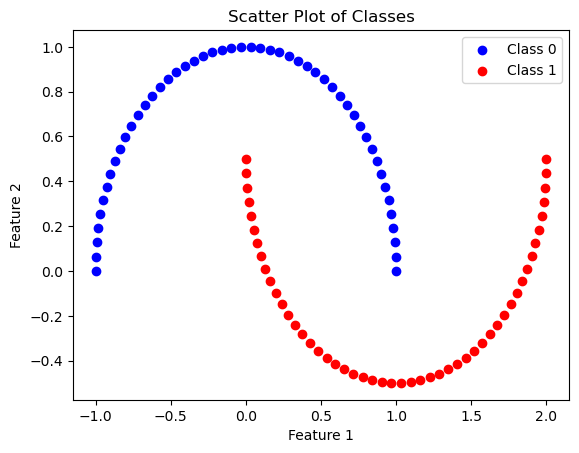

In [35]:

class_0 = X[y == 0]
class_1 = X[y == 1]


plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Classes')
plt.legend()


plt.show()


This scatter plot shows the distribution of two classes based on the dataset's two features (Feature 1 and Feature 2). Class 0 instances are represented by blue dots, whereas Class 1 instances are depicted in red. This allows us to see the distribution and probable separation of the classes based on these two properties. 

## Model Building

**Splitting the data into train and test sets**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

**Model 1: SVM model with a polynomial kernal of degree 3 and C= 1000**

In [38]:
model1 = SVC(kernel="poly", C=1000,degree =3)
model1.fit(X_train_scaled, y_train)

SVC(C=1000, kernel='poly')

In [39]:
y_pred_train = model1.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.9285714285714286

In [40]:
y_pred_test = model1.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.9333333333333333

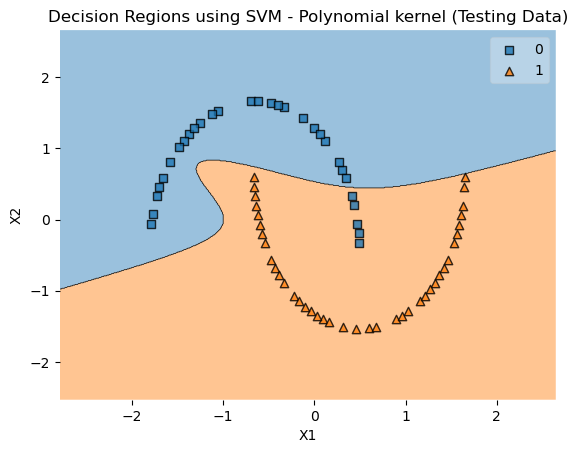

In [41]:
plot_decision_regions(X_train_scaled, y_train, clf = model1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions using SVM - Polynomial kernel (Testing Data)');

This plot shows the decision areas generated by an SVM classifier using a polynomial kernel on testing data for model 1. The decision regions outline parts of the feature space where the model makes various class predictions. This demonstrates how the SVM algorithm distinguishes classes based on the input properties X1 and X2. Color-coded regions correlate to each class, offering insight into the model's learnt categorization boundaries. 

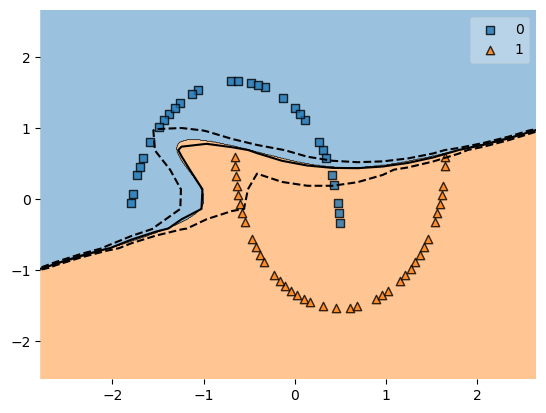

In [42]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model1.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model1);

This plot visualizes decision borders and decision regions for an SVM classifier (model 1). The contour lines represent the model's decision boundary (solid line) and margins (dashed lines). The decision areas are then stacked together, demonstrating how the classifier divides the feature space into regions corresponding to different class predictions. This helps to comprehend the model's categorization limits and behavior over the input feature space.

**Model 2: SVM model with a polynomial kernal of degree 3 and C= 10**

In [43]:
model2 = SVC(kernel="poly", C=10,degree =3)
model2.fit(X_train_scaled, y_train)

SVC(C=10, kernel='poly')

In [44]:
y_pred_train = model2.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.9142857142857143

In [45]:
y_pred_test = model2.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.9

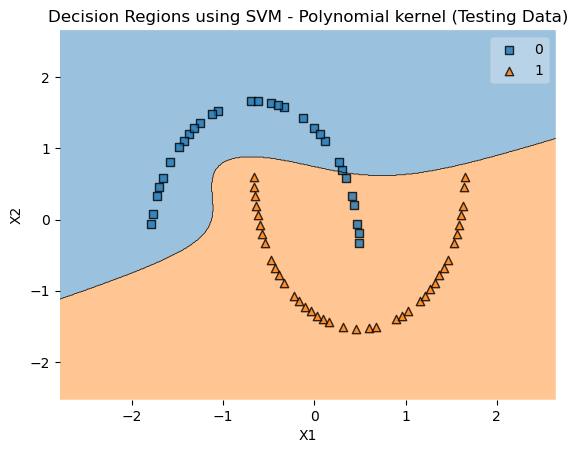

In [46]:
plot_decision_regions(X_train_scaled, y_train, clf = model2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions using SVM - Polynomial kernel (Testing Data)');

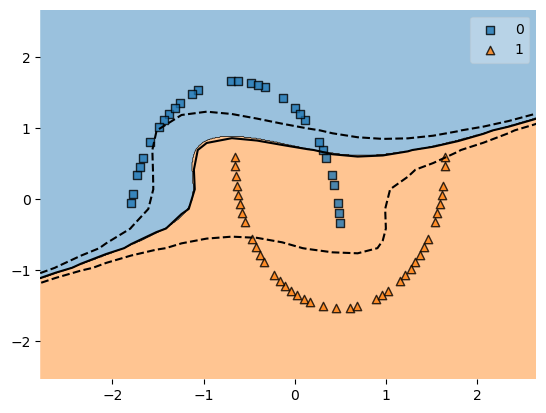

In [47]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model2.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model2);

This plot combines a contour map of decision boundaries and shaded decision regions for a trained SVM classifier for model 2 applied to the training data.

In [49]:
# Used RandomizedSearchCV for poly kernel with different values of C and degree
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1,1,2,3,4,5,10,100],
              'degree':[1,2,3,4,5,6,7],
              'kernel': ['poly']}
model=SVC()

random_cv=RandomizedSearchCV(model,param_grid,cv=5,scoring="accuracy",n_jobs=-1)
random_cv.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 2, 3, 4, 5, 10, 100],
                                        'degree': [1, 2, 3, 4, 5, 6, 7],
                                        'kernel': ['poly']},
                   scoring='accuracy')

In [50]:
# Displaying the best parameters which are obtained from randomizedsearchCV 
print(random_cv.best_params_)
print(random_cv.score(X_test_scaled,y_test))

{'kernel': 'poly', 'degree': 3, 'C': 100}
0.9


In [56]:
# Predicting the test data set using best parameters obtained from randomsearchCV
y_pred=random_cv.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1])

In [53]:
# Printing the classification report and confusion matrix of test data set
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[17  3]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.92      0.90      0.90        30



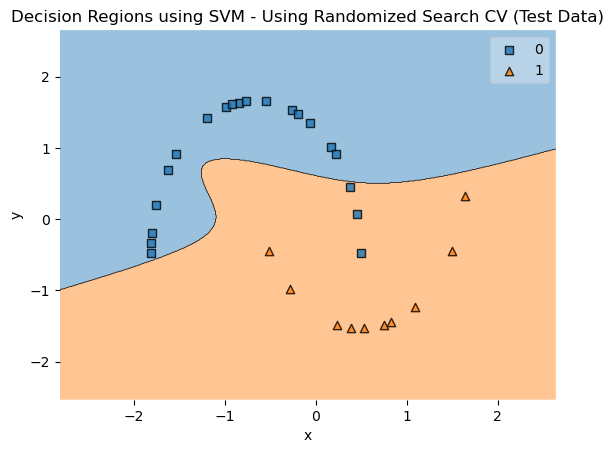

In [54]:
# Plotting the SVM graph for the data set
plot_decision_regions(X_test_scaled, y_test, clf = random_cv)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Regions using SVM - Using Randomized Search CV (Test Data)');

This plot shows the decision areas produced by an SVM classifier (random_cv) on the test dataset (X_test_scaled, y_test). The decision regions outline areas of the feature space where the model makes various class predictions. Visualizing these areas provides insight into how the SVM classifier categorizes test data based on input characteristics (x and y). 

**Model 3: SVM model with Gaussian RBF (Radial Basis Function) kernel with gamma 0.1**

In [57]:
model3 = SVC(kernel="rbf", gamma=0.1)
model3.fit(X_train_scaled, y_train)

SVC(gamma=0.1)

In [58]:
y_pred = model3.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.8571428571428571

In [59]:
y_pred = model3.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9

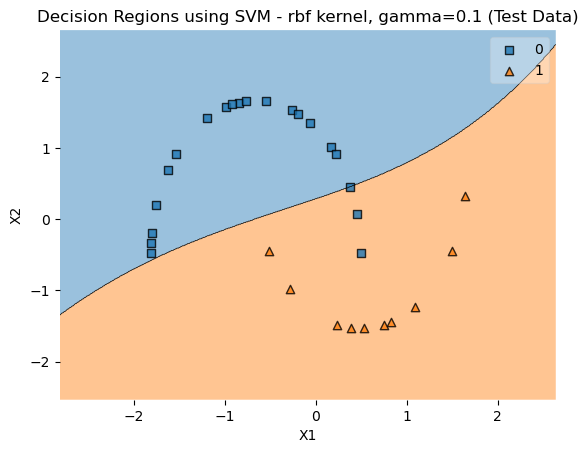

In [60]:
plot_decision_regions(X_test_scaled, y_test, clf = model3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions using SVM - rbf kernel, gamma=0.1 (Test Data)');

This figure shows the decision areas generated by an SVM classifier (model 3) using a radial basis function (RBF) kernel on the test dataset (X_test_scaled, y_test). The decision regions are the locations of the feature space where the classifier predicts various classes depending on the input characteristics (X1 and X2). By viewing these areas, we can see how the SVM model divides and categorizes the test data using the supplied RBF kernel and gamma value of 0.1. 

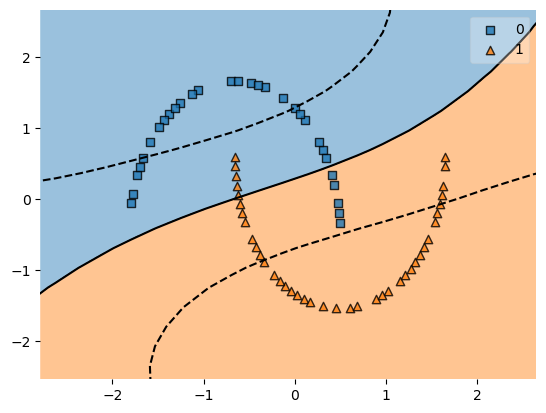

In [61]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model3.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model3);

This plot includes a contour map of decision boundaries and shaded decision areas for an SVM classifier (model3) with a radial basis function (RBF) kernel applied to the training data (X_train_scaled, y_train). The contour lines show the decision boundary where the classifier's output is zero (solid line) and its margins (dashed lines). The shaded sections show how the SVM classifier divides the feature space into separate parts that correspond to discrete class predictions.

**Model 4: SVM model with Gaussian RBF (Radial Basis Function) kernel with gamma 100**

In [62]:
model4 = SVC(kernel="rbf", gamma=100)
model4.fit(X_train_scaled, y_train)

SVC(gamma=100)

In [63]:
y_pred = model4.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

1.0

In [64]:
y_pred = model4.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8666666666666667

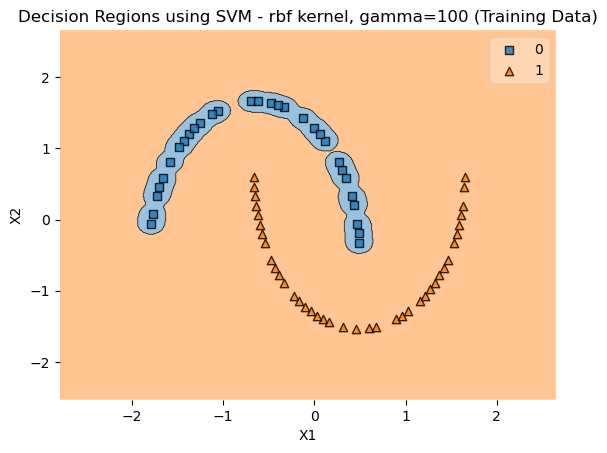

In [65]:
plot_decision_regions(X_train_scaled, y_train, clf = model4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions using SVM - rbf kernel, gamma=100 (Training Data)');

This plot showcases the decision regions created by an SVM classifier (model4) with a radial basis function (RBF) kernel applied to the training dataset (X_train_scaled, y_train). The decision regions represent different areas in the feature space where the classifier predicts distinct classes based on the input features (X1 and X2). With a high gamma value of 100 for the RBF kernel, this visualization provides insights into how the SVM model separates and categorizes the training data, emphasizing tighter and potentially more complex decision boundaries.

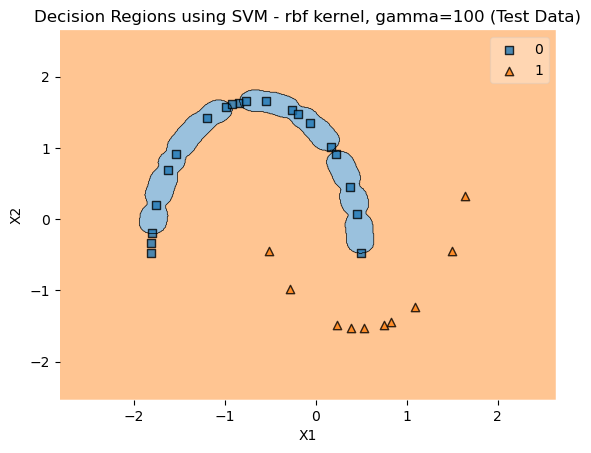

In [66]:
plot_decision_regions(X_test_scaled, y_test, clf = model4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions using SVM - rbf kernel, gamma=100 (Test Data)');

This shows the decision areas generated by an SVM classifier (model4) employing a radial basis function (RBF) kernel with a high gamma value of 100 on the test dataset (X_test_scaled, y_test). The decision areas show how the SVM classifier separates the test data using the input characteristics (X1 and X2). Here a high gamma value, such as 100, shows complicated and tightly fitted decision boundaries, perhaps suggesting overfitting if the model catches noise or particular aspects from training data that do not translate well to unseen test data.

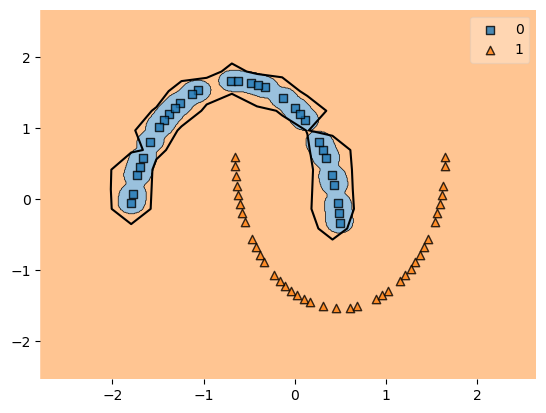

In [67]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model4.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model4);

This graph includes a contour map of decision borders and shaded decision areas generated by an SVM classifier (model4) with a radial basis function (RBF) kernel applied to the training dataset. The contour lines show distinct levels of the classifier's decision function (at -1, 0, and 1), which define the decision boundaries between classes. The shaded regions show how the SVM classifier separates the feature space according to the input characteristics (X1 and X2). 

In [68]:
# Used RandomizedSearchCV for rbf, sigmoid kernel with different values of C and gamma values 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid = {'C': [0.1,1,2,3,4,5,10,100],
              'gamma': ["scale","auto"],
              'kernel': ['rbf']}
model=SVC()

random_cv=RandomizedSearchCV(model,param_grid,cv=5,scoring="accuracy",n_jobs=-1)
random_cv.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 2, 3, 4, 5, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf']},
                   scoring='accuracy')

In [69]:
# Displaying the best parameters which are obtained from randomizedsearchCV 
print(random_cv.best_params_)
print(random_cv.score(X_test_scaled,y_test))

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
1.0


In [70]:
# Predicting the test data set using best parameters obtained from randomsearchCV
y_pred=random_cv.predict(X_test_scaled)

In [71]:
# Printing the classification report and confusion matrix of test data set
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[20  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



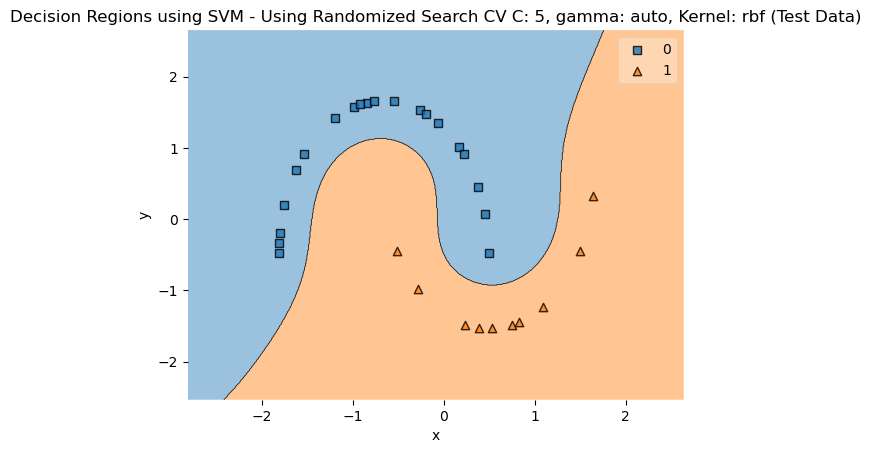

In [72]:
# Plotting the SVM graph for the data set
plot_decision_regions(X_test_scaled, y_test, clf = random_cv)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Regions using SVM - Using Randomized Search CV C: 5, gamma: auto, Kernel: rbf (Test Data)');

The figure depicts the decision regions produced by an SVM classifier trained using Randomized Search CV with specified hyperparameters (C: 5, gamma: auto, Kernel: rbf) and applied to the test dataset (X_test_scaled, y_test). The decision regions show how the SVM model categorizes the test data using the input characteristics (x and y). By analyzing these decision areas, we may learn about how effectively the SVM classifier generalizes to previously unknown test data, taking into account the hyperparameter tweaking accomplished using Randomized Seard

### CONCLUSION: 

#### 

1. **Impact of Hyperparameters C and γ**:
   - **C**: 
       - Model 1 (C=1000) have an accuracy score for test and train data which implies that it’s not overfitting. But increasing  the c even more might lead to overfitting. 
       - Model 2 (C=10) achieved a better balance between bias and variance, resulting in improved generalization and a smoother  decision boundary.
   - **γ**: 
       - Model 3 (γ=0.1) with the RBF kernel showed a balanced decision boundary, capturing underlying patterns effectively.
       - Model 4 (γ=100) with RBF kernel resulted in overfitting due to excessive complexity.

2. **Effect of Kernel Functions**:
   - Polynomial Kernels:
       - Models 1 and 2 with polynomial kernels effectively captured nonlinear patterns in the data.
   - RBF Kernel:
       - Models 3 and 4 with RBF kernels provided flexibility in capturing complex patterns, but required careful tuning of the γ parameter to prevent overfitting.

3. **Values Tested**:
   - Model 1: Polynomial kernel, C=1000, Degree=3
   - Model 2: Polynomial kernel, C=10, Degree=3
   - Model 3: RBF kernel, C=default, γ=0.1
   - Model 4: RBF kernel, C=default, γ=100

4. **Overall Conclusion**:
   - Careful selection of hyperparameters and kernel functions is crucial for developing robust SVM classifiers.
   - Models with lower complexity (e.g., Model 2 with C=10) tend to generalize better, avoiding overfitting. But if we go for a really higher complexity model (e.g., more than Model 1 with C=1000) then we might observe overfitting.
   - The choice between polynomial and RBF kernels depends on the dataset's characteristics, with RBF offering flexibility in capturing complex patterns but requiring careful tuning to prevent overfitting.
   - Optimization techniques like RandomizedSearchCV aid in identifying optimal hyperparameters, leading to competitive model performance.
   - Ultimately, achieving a balance between model complexity, bias, and variance is essential for developing effective SVM classifiers capable of accurately capturing underlying patterns in datasets.